載入 MNIST 的 Keras 資料集模組

In [1]:
from tensorflow.keras.datasets import mnist

載入 MNIST 資料，資料已分割成影像和標籤，可用於訓練與驗證

In [2]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

### 查看資料樣貌

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_valid.shape

(10000, 28, 28)

- 影像本身是尺寸 28x28 的 2D 陣列- 
介於 0 到 255 的 8 bits unsinged integer (正整數值)

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
x_train.min()

0

In [7]:
x_train.max()

255

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

查看資料視覺

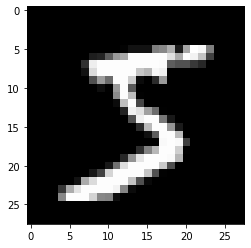

In [9]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

這張圖的 `label`

In [10]:
y_train[0]

5

### 扁平化 (Flatten) 影像資料

In [11]:
# Keras API Helper
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### 正規化影像資料

In [14]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [15]:
x_train.dtype

dtype('float64')

In [16]:
x_train.min()

0.0

In [17]:
x_train.max()

1.0

### 分類編碼

舉例：
|實際色彩| 是紅色嗎？| 是藍色嗎？| 是綠色嗎？|
|------------|---------|----------|----------|
|紅色|1|0|0|
|綠色|0|0|1|
|藍色|0|1|0|
|綠色|0|0|1|

也就是

```python
values = ['red, green, blue, green']
```

轉換為

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

In [18]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [19]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)